# Neural Networks - Exercises

## EXERCISE 1

A very small NN has an input layer with 2 nodes and an output layer with 1 node. The are no hidden nodes. Calculate the feedforward pass if the input is [1, 1] the weights are [0.3, -0.1] and the bias is -0.7. The activation function used by the output layer is `sigmoid`. Use numpy arrays and the python `math` module to calculate the output the integration and activation function of the output node. Which of the 2 inputs has the biggest influence one the output?

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.python.ops.gen_batch_ops import batch

from plot_loss import plot_loss # own function in plot_loss.py

integration = lambda inputs, weights, bias: np.sum(inputs * weights) + bias 
sigmoid = lambda integration_value: 1 / (1 + np.exp(-integration_value)) #also import math; math.exp()

input_values = np.array([1, 1])
weights = np.array([0.3, -0.1])
bias = -0.7

integration_result = integration(input_values, weights, bias)
sigmoid_result = sigmoid(integration_result)

print(integration_result, sigmoid_result)

-0.5 0.3775406687981454


## EXERCISE 2

The goal is to predict the quality class of wine, based on features that come from a chemical analysis of the wine.

In [39]:
import numpy as np
from sklearn.datasets import load_wine
wine_x = load_wine().data
wine_y = load_wine().target
load_wine().DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 178\n:Number of Attributes: 13 numeric, predictive attributes and the class\n:Attribute Information:\n    - Alcohol\n    - Malic acid\n    - Ash\n    - Alcalinity of ash\n    - Magnesium\n    - Total phenols\n    - Flavanoids\n    - Nonflavanoid phenols\n    - Proanthocyanins\n    - Color intensity\n    - Hue\n    - OD280/OD315 of diluted wines\n    - Proline\n    - class:\n        - class_0\n        - class_1\n        - class_2\n\n:Summary Statistics:\n\n============================= ==== ===== ======= =====\n                                Min   Max   Mean     SD\n============================= ==== ===== ======= =====\nAlcohol:                      11.0  14.8    13.0   0.8\nMalic Acid:                   0.74  5.80    2.34  1.12\nAsh:                          1.36  3.23    2.36  0.27\nAlcalinity of Ash:            10.6  30.0    19.5   3.3\nMagnesium:      

### 1. Data preparation

a. Print the shapes of wine_x and wine_y. How many wines do we have? How many featues do we have? Check whether there NaN values. How many quality classes do we have?

In [40]:
# shapes
print(wine_x.shape)
print(wine_y.shape)

(178, 13)
(178,)


In [41]:
# nan
# pd.DataFrame(wine_x).isnull().sum()
np.isnan(wine_x).sum()

0

In [42]:
# classes
np.unique(wine_y)

array([0, 1, 2])

b. Scale the input using min_max scaling (why do we do this?). Split the data in a train (85%) and test dataset (15%) (why do we do this?). Put the output in the right format. What is the name of the format?

In [43]:
# scale
scaler = MinMaxScaler()
wine_x_norm = scaler.fit_transform(wine_x)
# Normalizing helps the model learn faster and improves performance.
"""
1. **Min-Max Scaling**: 
   - **Why**: It makes sure that all input features (like age, salary) are on the same scale. Without this, some features might dominate the model just because their numbers are bigger.
   - **In simple terms**: We make sure everything is in the same "range" so the model can treat all features equally.
"""

'\n1. **Min-Max Scaling**: \n   - **Why**: It makes sure that all input features (like age, salary) are on the same scale. Without this, some features might dominate the model just because their numbers are bigger.\n   - **In simple terms**: We make sure everything is in the same "range" so the model can treat all features equally.\n'

In [44]:
# split
wine_train_x, wine_test_x, wine_train_y, wine_test_y = train_test_split(wine_x_norm, wine_y, test_size=.15)
# To be able to validate our model
"""
2. **Train-Test Split**:
   - **Why**: We need to train the model with some data, but also test it on data it has never seen before. This helps us understand how well it will work in real life (with new data).
   - **In simple terms**: We train the model on one set of data and test it on another to see if it can make accurate predictions.
"""

'\n2. **Train-Test Split**:\n   - **Why**: We need to train the model with some data, but also test it on data it has never seen before. This helps us understand how well it will work in real life (with new data).\n   - **In simple terms**: We train the model on one set of data and test it on another to see if it can make accurate predictions.\n'

In [45]:
from tensorflow.keras.utils import to_categorical
# convert output to right format
y_train_onehot = to_categorical(wine_train_y)
y_test_onehot = to_categorical(wine_test_y)
print(y_train_onehot.shape)

"""
3. **One-Hot Encoding**:
   - **Why**: Machine learning models need numerical data to work. One-hot encoding turns categories (like "dog", "cat", "fish") into numbers so the model can process them correctly.
   - **In simple terms**: We change categories into numbers so the model can understand them.
"""

(151, 3)


'\n3. **One-Hot Encoding**:\n   - **Why**: Machine learning models need numerical data to work. One-hot encoding turns categories (like "dog", "cat", "fish") into numbers so the model can process them correctly.\n   - **In simple terms**: We change categories into numbers so the model can understand them.\n'

### 2. Define the model

Define the input layer with the right number of nodes. For the hidden layers, try out several options yourself. Define the output layer with the right number of nodes and a correct activation function. Print a model summary and compile the model with the Adam optimizer (choose the learning rate yourself), the correct loss function and a well choosen metric.

In [46]:
# define the model
wine_x_norm.shape
inputs = Input(shape=(13,))
# 2 hidden layer
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
# output layer
outputs = Dense(3, activation='softmax')(x)
# construct the model
model = Model(inputs, outputs, name='WINE')
# print a summary
model.summary()
# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "WINE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,243 (40.01 KB)

 Trainable params: 10,243 (40.01 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Train the model

Train the model with 10% of the training data taken for validation. Choose the number of epochs and the batch_size. Plot the loss function. Do we have overfitting?

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.4196 - loss: 1.0892 - val_accuracy: 0.7500 - val_loss: 1.0138
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5761 - loss: 1.0261 - val_accuracy: 0.7500 - val_loss: 0.9436
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5301 - loss: 0.9829 - val_accuracy: 0.8750 - val_loss: 0.8938
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7484 - loss: 0.9241 - val_accuracy: 1.0000 - val_loss: 0.8469
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9019 - loss: 0.8647 - val_accuracy: 1.0000 - val_loss: 0.8050
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8736 - loss: 0.8079 - val_accuracy: 1.0000 - val_loss: 0.7520
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9100 - loss: 0.7298 - val_accuracy: 1.0000 - val_loss: 0.6831
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8618 - loss: 0.6821 - val_accuracy: 1.0000 - val_loss: 0.

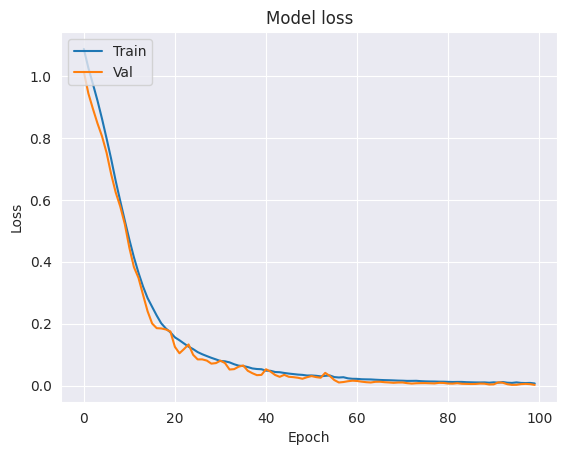

In [47]:
from plot_loss import plot_loss
# train the model
history = model.fit(
    wine_train_x, # training input
    y_train_onehot, # training targets
    epochs=100,
    batch_size=32,
    validation_split=0.1,
)
# plot loss function
plot_loss(history)

### 4. Evaluate the model

Evaluate the model with the test dataset (why thisone?). What is the accuracy of the model?

In [48]:
# evaluate the model
model.evaluate(wine_test_x, y_test_onehot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0130


[0.01295820064842701, 1.0]

### 5. Use the model to predict

There is a new wine with the following characteristics for the features: 12, 6.5, 3, 25, 100, 2.5, 4, 0.5, 2, 8, 1, 3, 500. Predict the quality for this wine. What should be the shape of the predict parameter? Can we feed in the feature values right away? Which quality class is predicted? How sure is the prediction?

In [49]:
# predict
new_wine = [[12, 6.5, 3, 25, 100, 2.5, 4, 0.5, 2, 8, 1, 3, 500]]  # 2-dimensional!
new_wine_norm = scaler.transform(new_wine)  # no fit!
predicted_class = model.predict(new_wine_norm)
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[2.194756e-02 9.774507e-01 6.017498e-04]]


## EXERCISE 3

In this exercise we will predict the house price, based on some characteristics of the house.

In [83]:
from sklearn.datasets import fetch_california_housing
houses_x = fetch_california_housing().data
houses_y = fetch_california_housing().target
fetch_california_housing().DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

### 1. Data preparation

a. Print the shapes of houses_x and houses_y. How many houses do we have? How many featues do we have? Check whether there NaN values.

In [69]:
# shapes
print(houses_x.shape)
print(houses_y.shape)
houses_y.reshape(-1, 1)
# there are 20640 houses
# there are 8 features per house (8 * 20640)

(20640, 8)
(20640,)


array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [61]:
# nan
np.isnan(houses_x).sum()

0

In [73]:
np.unique(houses_y).shape

(3842,)

b. Scale the input using min_max scaling (why do we do this?). Split the data in a train (90%) and test dataset (10%) (why do we do this?).

In [84]:
# scale
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(houses_x)

# y_train_onehot = to_categorical()

In [85]:
# split
houses_train_x, houses_test_x, houses_train_y, houses_test_y = train_test_split(x_norm, houses_y, test_size=0.1)

### 2. Define the model

Define the input layer with the right number of nodes. For the hidden layers, try out several options yourself. Define the output layer with the right number of nodes and a correct activation function. Print a model summary and compile the model with the Adam optimizer (choose the learning rate yourself), the correct loss function and a well choosen metric. How many parameters (weights and biases) does your model have?

In [86]:
# define model
inputs = Input(shape=(8,))
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='linear')(x)
model = Model(inputs, outputs, name='Houses')

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_percentage_error']
)

### 3. Train the model

Train the model with 10% of the training data taken for validation. Choose the number of epochs and the batch_size. Plot the loss function. Do we have overfitting?

Epoch 1/5
523/523 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6100 - mean_absolute_percentage_error: 53.0660 - val_loss: 0.5517 - val_mean_absolute_percentage_error: 32.6622
Epoch 2/5
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5554 - mean_absolute_percentage_error: 32.2098 - val_loss: 0.5136 - val_mean_absolute_percentage_error: 32.1220
Epoch 3/5
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5013 - mean_absolute_percentage_error: 29.1760 - val_loss: 0.5278 - val_mean_absolute_percentage_error: 37.7407
Epoch 4/5
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4789 - mean_absolute_percentage_error: 28.6211 - val_loss: 0.4441 - val_mean_absolute_percentage_error: 27.0185
Epoch 5/5
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4625 - mean_absolute_percentage_error: 27.3712 - val_loss: 0.4819 - val_mean_absolute_percentage_error: 22.7017


History.history:
 {'loss': [0.8981513977050781, 0.5428721308708191, 0.5021805763244629, 0.4761815369129181, 0.45900848507881165], 'me

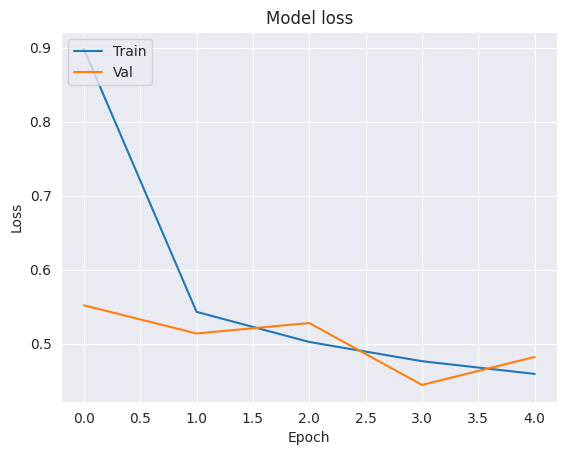

In [87]:
# train model
history = model.fit(
    houses_train_x,
    houses_train_y,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)
plot_loss(history)

### 4. Evaluate the model

Evaluate the model with the test dataset (why thisone?). What is the accuracy of the model?

In [88]:
# evaluate
model.evaluate(houses_test_x, houses_test_y)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 0.5175 - mean_absolute_percentage_error: 22.2852


[0.5201860070228577, 22.50972557067871]

### 5. Use the model to predict

There is a house on the market with the following values for the features: 3,30,5,1,1500,4,38,-125. Predict the price for this housee. What should be the shape of the predict parameter? Can we feed in the feature values right away? 

In [89]:
# predict
new_house = [[3,30,5,1,1500,4,38,-125]]  # 2-dimensional!
new_house_norm = scaler.transform(new_house)  # no fit!
predicted_price = model.predict(new_house_norm)
print(predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[[2.881237]]
